## Multi-label classification

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.conv_learner import *

In [8]:
# https://arxiv.org/abs/1511.08060
PATH = 'data/planet/'

In [4]:
# Data preparation steps if you are using Crestle:

os.makedirs('data/planet/models', exist_ok=True)
os.makedirs('/cache/planet/tmp', exist_ok=True)

!ln -s /datasets/kaggle/planet-understanding-the-amazon-from-space/train-jpg {PATH}
!ln -s /datasets/kaggle/planet-understanding-the-amazon-from-space/test-jpg {PATH}
!ln -s /datasets/kaggle/planet-understanding-the-amazon-from-space/train_v2.csv {PATH}
!ln -s /cache/planet/tmp {PATH}

In [3]:
ls {PATH}

CSV/     test-jpg/      tmp/        train-jpg.tar*  train_v2.csv.zip*
models/  test-jpg.tar*  train-jpg/  train_v2.csv*


## Multi-label versus single-label classification

In [9]:
from fastai.plots import *

In [10]:
def get_1st(path): return glob(f'{path}/*.*')[0]

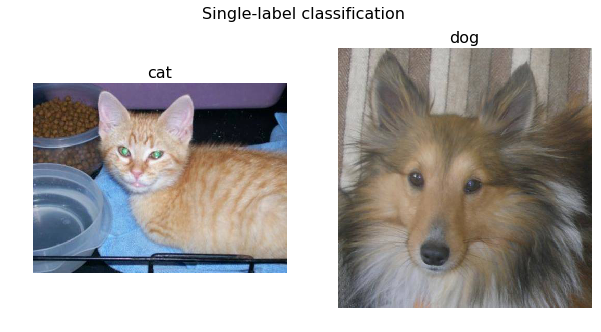

In [8]:
dc_path = "data/dogscats/valid/"
list_paths = [get_1st(f"{dc_path}cats"), get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-label classification")

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

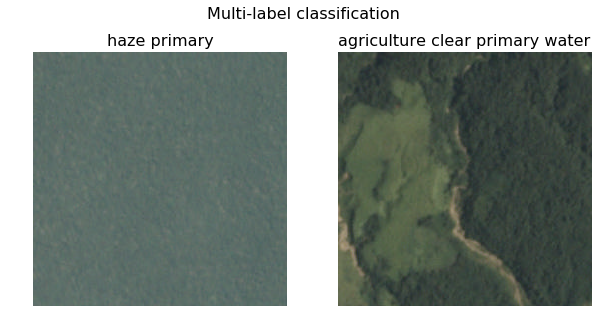

In [5]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [11]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [15]:
f2

<function planet.f2>

In [13]:
f2??

In [11]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [33]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms, 
                                        suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [34]:
data = get_data(256)

In [35]:
x,y = next(iter(data.val_dl))

data/planet/train-jpg/train_10868.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_11640.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_10391.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_12741.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_12304.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_13333.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_13638.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor


data/planet/train-jpg/train_37388.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_40437.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_37687.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_39051.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_39911.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_40174.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_3827.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor



In [36]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [37]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

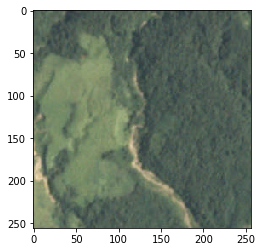

In [38]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [39]:
sz=64

In [40]:
data = get_data(sz)

In [41]:
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [46]:
ls {PATH}tmp

332/  83/


In [47]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.222033   0.303651   0.817103  



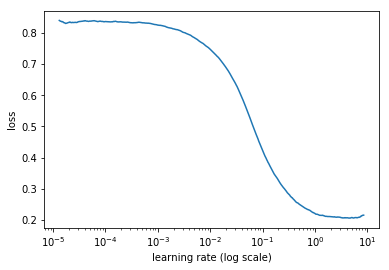

In [22]:
lrf=learn.lr_find()
learn.sched.plot()

In [23]:
lr = 0.2

In [24]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.147798   0.134424   0.880942  
    1      0.138473   0.129714   0.887297                    
    2      0.140094   0.127212   0.889631                    
    3      0.141137   0.127108   0.890505                    
    4      0.138455   0.124633   0.891847                    
    5      0.129367   0.122884   0.894201                    
    6      0.130233   0.122633   0.894046                    



[0.12263323, 0.8940456859075591]

In [25]:
lrs = np.array([lr/9,lr/3,lr])

In [26]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.118792   0.10911    0.907719  
    1      0.113295   0.106216   0.910242                    
    2      0.107486   0.10191    0.913909                    
    3      0.112386   0.104125   0.912751                    
    4      0.108528   0.100417   0.915037                    
    5      0.10338    0.097828   0.918134                     
    6      0.099096   0.09773    0.918342                     



[0.097729936, 0.9183418229483867]

In [27]:
learn.save(f'{sz}')

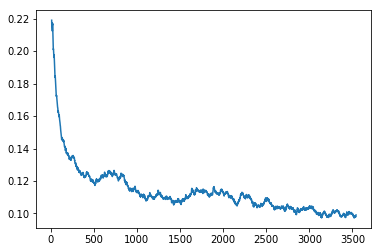

In [28]:
learn.sched.plot_loss()

In [29]:
sz=128

In [31]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/506 [00:00<?, ?it/s]data/planet/train-jpg/train_3577.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_12202.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_1935.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_18374.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_21376.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_6289.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor




AttributeError: 'NoneType' object has no attribute 'shape'

In [32]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/506 [00:00<?, ?it/s]data/planet/train-jpg/train_12096.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_3848.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_7846.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_31508.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_20528.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor

data/planet/train-jpg/train_74.jpg /io/opencv/modules/imgproc/src/color.cpp:10606: error: (-215) scn == 3 || scn == 4 in function cvtColor




AttributeError: 'NoneType' object has no attribute 'shape'

In [23]:
sz=256

In [24]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.09161  0.08651  0.92712]                         
[ 1.       0.08933  0.08665  0.92677]                         
[ 2.       0.09125  0.08584  0.92719]                         
[ 3.       0.08732  0.08532  0.92812]                         
[ 4.       0.08736  0.08479  0.92854]                         
[ 5.       0.08807  0.08471  0.92835]                         
[ 6.       0.08942  0.08448  0.9289 ]                         



In [25]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.08932  0.08218  0.9324 ]                         
[ 1.       0.08654  0.08195  0.93313]                         
[ 2.       0.08468  0.08024  0.93391]                         
[ 3.       0.08596  0.08141  0.93287]                         
[ 4.       0.08211  0.08152  0.93401]                         
[ 5.       0.07971  0.08001  0.93377]                         
[ 6.       0.07928  0.0792   0.93554]                         



In [26]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
f2(preds,y)

0.93626519738612801

### End